# Let's crate a Chatbot to talk to.

<div>
<img src="https://blog-assets.freshworks.com/freshdesk/wp-content/uploads/2018/08/Header_gif_assembly-1.gif" width="600"/>
</div>


<br><br>

**Steps:**
* Using NLTK to create a basic Chatbot.
* Using BERT to create a Q&A Chatbot.
* Using BERT to create a Chatbot with personality.
* Using BERT to talk to a Harry Potter Chatbot.

<br><br>

?? Image ??
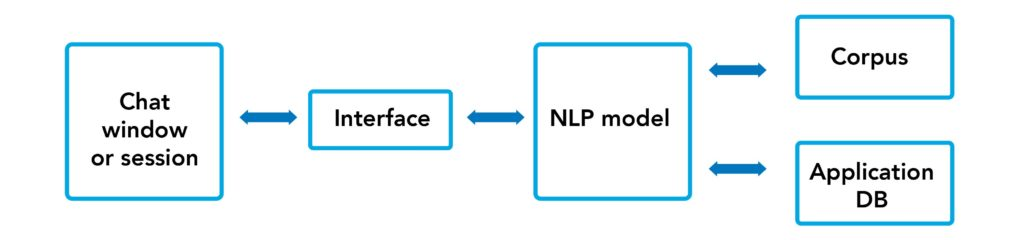



<br><br>


Disable warning:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Dataset:

In [ ]:
from tensorflow.keras.utils import get_file

# from 
URLS = [
    "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt",
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%203%20-%20The%20Prisoner%20of%20Azkaban.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%204%20-%20The%20Goblet%20of%20Fire.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%205%20-%20The%20Order%20of%20the%20Phoenix.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%206%20-%20The%20Half%20Blood%20Prince.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%207%20-%20The%20Deathly%20Hallows.txt'
]

# get file from url, and save in cache
path_to_file = get_file('book1.txt', URLS[0])

# get text from file
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

# The unique characters in the file
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))

499712/492161 [==============================] - 0s 0us/step
Length of text: 474429 characters
84 unique characters


<br><br><br><br><br>


# Chatbot - NLTK 


#### Imports:

In [ ]:
import io
import random
import string 
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.stem import WordNetLemmatizer

#### Downloading NLTK packages:

In [ ]:
nltk.download('popular', quiet=True)
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Set corpus:

In [ ]:
raw = text.lower()

#### Tokenization

In [ ]:
# converts to list of sentences
sent_tokens = nltk.sent_tokenize(raw)

# converts to list of words
word_tokens = nltk.word_tokenize(raw)

#### Preprocessing

In [ ]:
lemmer = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

#### Greeting:

In [ ]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]

def greeting(sentence):
    """If user's input is a greeting, return a greeting response"""
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

#### Response:  (using TF-IDF)


In [ ]:
def response(user_response):
    
    # add user response
    sent_tokens.append(user_response)
    
    # remove stopwords, vectorize, transform
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf    = TfidfVec.fit_transform(sent_tokens)
    
    # similarity
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx  = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    
    req_tfidf = flat[-2]
    if req_tfidf == 0 : # in case the similarity is zero
        return  "I am sorry! I don't understand you."
        
    # actual response
    return '' + sent_tokens[idx]

#### Talking loop:

In [ ]:
print("BOT: I'm am a chatbot. I can answer your queries about harry potter's book1. \nIf you want to exit, type 'Bye'")

while( True ):
    
    # get input from user
    user_response = input()
    
    # lower case
    user_response = user_response.lower()

    # check for finish
    if user_response == 'bye':
        print("BOT: Bye! take care..")
        break
        
    # some rule base responses
    if user_response == 'thanks'   or   user_response == 'thank you':
        print("BOT: You are welcome..")
        continue
     
    if  greeting(user_response) != None :
        print("BOT: " + greeting(user_response))
        continue
    
    # actual responce
    print("BOT: " + response(user_response))
    sent_tokens.remove(user_response)
    
        

BOT: I'm am a chatbot. I can answer your queries about harry potter's book1. 
If you want to exit, type 'Bye'
hello :)
BOT: I am glad! You are talking to me
yes,who is harry?
BOT: “harry potter,” said harry.
I asked who is he?
BOT: how do you know?” 

“asked him.
ok
BOT: I am sorry! I don't understand you.
thanks
BOT: You are welcome..
who is Ron?
BOT: ron!
yes Ron.
BOT: “yes, yes.
ok got u
BOT: what is that to do with us?
nothing
BOT: I am sorry! I don't understand you.
that's ok, I will make u understand
BOT: how could they ever make up for this?
bye
BOT: Bye! take care..


### Conclusions:  

That's kinda cool, but it's easy to see that the Bot is not really talking, but more or less quoting from the book.     
I need to make the Bot "understand", and make it mostly know how to generate better sentences.  


<br><br><br>
<br><br><br>
<br><br><br>

# Chatbot - BERT

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.3MB 2.8MB/s 
     |████████████████████████████████| 1.1MB 17.1MB/s 
     |████████████████████████████████| 2.9MB 20.5MB/s 
     |████████████████████████████████| 890kB 36.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=65b4506e1364444ab16286c9321dd26ac78377ae4b2824273247a44b3cdc1239
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


#### Import

In [ ]:
import torch 

from transformers import BertTokenizer
from transformers import BertForQuestionAnswering

#### Download

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

#### Answer Question

In [ ]:
def answer_question(question, answer_text):
    '''
    Takes a `question` string and an `answer_text` string (which contains the
    answer), and identifies the words within the `answer_text` that are the
    answer. Prints them out.
    '''
    # ======== Tokenize ========
    # Apply the tokenizer to the input text, treating them as a text-pair.
    input_ids = tokenizer.encode(question, answer_text)

    # Report how long the input sequence is.
    # print('Query has {:,} tokens.\n'.format(len(input_ids)))

    # ======== Set Segment IDs ========
    # Search the input_ids for the first instance of the `[SEP]` token.
    sep_index = input_ids.index(tokenizer.sep_token_id)

    # The number of segment A tokens includes the [SEP] token istelf.
    num_seg_a = sep_index + 1

    # The remainder are segment B.
    num_seg_b = len(input_ids) - num_seg_a

    # Construct the list of 0s and 1s.
    segment_ids = [0]*num_seg_a + [1]*num_seg_b

    # There should be a segment_id for every input token.
    assert len(segment_ids) == len(input_ids)

    # ======== Evaluate ========
    # Run our example question through the model.
    start_scores, end_scores = model(torch.tensor([input_ids]), # The tokens representing our input text.
                                    token_type_ids=torch.tensor([segment_ids])) # The segment IDs to differentiate question from answer_text

    # ======== Reconstruct Answer ========
    # Find the tokens with the highest `start` and `end` scores.
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)

    # Get the string versions of the input tokens.
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    # Start with the first token.
    answer = tokens[answer_start]

    # Select the remaining answer tokens and join them with whitespace.
    for i in range(answer_start + 1, answer_end + 1):
        
        # If it's a subword token, then recombine it with the previous token.
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]
        
        # Otherwise, add a space then the token.
        else:
            answer += ' ' + tokens[i]

    if '[SEP]' in answer:
        return "Is that a questions? cuz I don't understand."
    
    return answer

#### Talking Loop

In [ ]:
print("BOT: I'm am a chatbot. I can answer your queries about harry potter's book1. \nIf you want to exit, type 'Bye'\n")

from_text = text.lower()[0:2000]

while( True ):
    
    # get input from user
    user_response = input()
    
    # lower case
    user_response = user_response.lower()

    # check for finish
    if user_response == 'bye':
        print("BOT: Bye! take care..")
        break
    
    # actual responce
    print("BOT: " + answer_question(user_response, from_text))
    
        

BOT: I'm am a chatbot. I can answer your queries about harry potter's book1. 
If you want to exit, type 'Bye'

Who is Dursley?
BOT: mr . dursley was the director of a firm called grunnings
who is Dursely's sister?
BOT: mrs . potter
where is he works?
BOT: grunnings
Who is harry potter?
BOT: Is that a questions? cuz I don't understand.
u don't know who is harry potter?
BOT: Is that a questions? cuz I don't understand.
your not that good of a bot.
BOT: Is that a questions? cuz I don't understand.
bye
BOT: Bye! take care..


### Conclusions:

As I mentioned, I already build something like that.     
Also, I could find out why HugginFace closes the models for 512/1024 unique ID's.    

There is still problems with the model. The Bot can answer questions, but not really talking.  
